<a href="https://colab.research.google.com/github/mengyanl/springboard/blob/main/PySpark_Learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2nd Google Colab notebook
## from LinkedIn learning Jonathan Fernandes tutorials

In [1]:
!ls

sample_data


In [2]:
# download java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [3]:
# Installing Spark 3.2.0 with Hadoop 2.7
!wget -q https://downloads.apache.org/spark/spark-3.2.0//spark-3.2.0-bin-hadoop2.7.tgz

In [4]:
# unzip the folder
!tar xf spark-3.2.0-bin-hadoop2.7.tgz

In [5]:
# install ‘findspark’ library. 
#It will locate Spark on the system and import it as a regular library.
!pip install -q findspark

## Setup Environment

In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop2.7"
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.0-bin-hadoop2.7'

In [7]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

import pyspark
from pyspark.sql import SparkSession
spark= SparkSession \
       .builder \
       .appName("Our First Spark example") \
       .getOrCreate()

spark

In [8]:
!ls

sample_data  spark-3.2.0-bin-hadoop2.7	spark-3.2.0-bin-hadoop2.7.tgz


# Download Data from LinkedIn learning course

In [9]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
!mv rows.csv\?accessType\=DOWNLOAD reported_crimes.csv

--2021-11-24 02:00:19--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [             <=>    ]   1.63G  2.98MB/s    in 10m 36s 

2021-11-24 02:10:56 (2.63 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1756268680]



In [10]:
# hadoop fs -put localfile /Users/Ling/Desktop/01_Springboard/Exercise_PySpark/Crimes_2001_to_Present.csv
# rc = spark.read.format('csv').load("file:///Users/Ling/Desktop/01_Springboard/Exercise_PySpark/Crimes_2001_to_Present.csv")
# rc.withColumn('DATE',to_timestamp(col('DATE'),'MM/dd/yyyy hh:mm:ss a')).filter(col('DATE') <= lit('2002-01-01'))
# rc.show(5)

In [11]:
!ls

reported_crimes.csv  spark-3.2.0-bin-hadoop2.7
sample_data	     spark-3.2.0-bin-hadoop2.7.tgz


In [14]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported_crimes.csv', header = True).withColumn('DATE',to_timestamp(col('DATE'),'MM/dd/yyyy hh:mm:ss a')).filter(col('DATE') <= lit('2002-01-01'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+-----------+-------------+--------------------+
|      ID|Case Number|               DATE|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|   Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+-----------+-------------+--------------------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|

# Functions

In [15]:
# buildin functions
from pyspark.sql import functions
print(dir(functions))

# from pyspark.sql.functions import mean
# df.select(mean(df.column1)).show()

['Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_udf', '_get_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_column', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aggregate', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'array_distinct', 'array_except', 'array_intersect', 'array_join', 'array_max', 'array_min', 'array_position', 'array_remove', 'array_repeat', 'array_sort', 'array_union', 'arrays_overlap', 'arrays_zip', 'asc', 'asc_nulls_first', 'asc_nulls_last', 'ascii', 'asin', 'asinh', 'assert_true', 'atan', 'atan2', 'atanh', 'a

In [16]:
from pyspark.sql.functions import lower, upper, substring

In [17]:
help(substring)   # position is 1 based

Help on function substring in module pyspark.sql.functions:

substring(str, pos, len)
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]



In [18]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- DATE: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



## Display the Primary Description column in lower and upper charicters and the first 4 charicters of the column

In [20]:
rc.select(lower(col('PRIMARY TYPE')), upper(col('PRIMARY TYPE')), substring(col('PRIMARY TYPE'), 1,4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(PRIMARY TYPE)|upper(PRIMARY TYPE)|substring(PRIMARY TYPE, 1, 4)|
+-------------------+-------------------+-----------------------------+
| deceptive practice| DECEPTIVE PRACTICE|                         DECE|
|            battery|            BATTERY|                         BATT|
|              theft|              THEFT|                         THEF|
|            battery|            BATTERY|                         BATT|
|           homicide|           HOMICIDE|                         HOMI|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



## Show the oldest and the most recent dates

In [21]:
from pyspark.sql.functions import min, max

In [22]:
rc.select(min(col('DATE')), max(col('DATE'))).show(1)

+-------------------+-------------------+
|          min(DATE)|          max(DATE)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2002-01-01 00:00:00|
+-------------------+-------------------+



## waht is 3 days earlier than the oldest data and 3 days later than the most recent date?

In [23]:
from pyspark.sql.functions import date_add, date_sub

In [24]:
help(date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start, days)
    Returns the date that is `days` days after `start`
    
    .. versionadded:: 1.5.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Row(next_date=datetime.date(2015, 4, 9))]



In [25]:
rc.select(date_sub(min(col('DATE')), 3),date_add(max(col('DATE')), 3)).show(1)

+----------------------+----------------------+
|date_sub(min(DATE), 3)|date_add(max(DATE), 3)|
+----------------------+----------------------+
|            2000-12-29|            2002-01-04|
+----------------------+----------------------+



In [26]:
from pyspark.sql.functions import to_date, to_timestamp, lit

In [27]:
df = spark.createDataFrame([('2019-12-25 13:30:00', )], ['Christmas'])
df.show(1)

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [28]:
df.select(to_date(col('Christmas'), 'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'), 'yyyy-MM-dd HH:mm:ss')).show(1)

+---------------------------------------+--------------------------------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|to_timestamp(Christmas, yyyy-MM-dd HH:mm:ss)|
+---------------------------------------+--------------------------------------------+
|                             2019-12-25|                         2019-12-25 13:30:00|
+---------------------------------------+--------------------------------------------+



In [29]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00', )], ['Christmas'])
df.show(1)

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [30]:
df.select(to_date(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss')).show(1)

+----------------------------------------+---------------------------------------------+
|to_date(Christmas, dd/MMM/yyyy HH:mm:ss)|to_timestamp(Christmas, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------------+---------------------------------------------+
|                              2019-12-25|                          2019-12-25 13:30:00|
+----------------------------------------+---------------------------------------------+



In [31]:
df = spark.createDataFrame([('12/25/2021 01:30:00 PM', )], ['Christmas'])
df.show(1, truncate = False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2021 01:30:00 PM|
+----------------------+



In [32]:
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
df.select(to_date(col('Christmas'), 'MM/dd/yyyy hh:mm:ss aa'),to_timestamp(col('Christmas'), 'MM/dd/yyyy hh:mm:ss aa')).show(1)

+------------------------------------------+-----------------------------------------------+
|to_date(Christmas, MM/dd/yyyy hh:mm:ss aa)|to_timestamp(Christmas, MM/dd/yyyy hh:mm:ss aa)|
+------------------------------------------+-----------------------------------------------+
|                                2021-12-25|                            2021-12-25 13:30:00|
+------------------------------------------+-----------------------------------------------+



In [33]:
nrc=spark.read.csv('reported_crimes.csv',header=True)
nrc.show(5, truncate = False)

+--------+-----------+----------------------+---------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date                  |Block                |IUCR|Primary Type|Description            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+----------------------+---------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|10224738|HY411648   |09/05/2015 01:30:00 PM|043XX S WOOD ST      |0486|BATTERY     |DOMESTIC BAT

In [34]:
## self created functions: better to create in JAVA or Scala

## Join
### df.join(df2, df.column == df2.column, how = {'inner})

In [35]:
!wget -O plice_station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD

--2021-11-24 02:35:24--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘plice_station.csv’

plice_station.csv       [ <=>                ]   5.57K  --.-KB/s    in 0s      

2021-11-24 02:35:25 (396 MB/s) - ‘plice_station.csv’ saved [5699]



In [39]:
!ls
ps = spark.read.csv('plice_station.csv', header = True)
ps.show(5)

plice_station.csv    sample_data		spark-3.2.0-bin-hadoop2.7.tgz
reported_crimes.csv  spark-3.2.0-bin-hadoop2.7
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica

In [40]:
ps.select(col('DISTRICT')).distinct().show(30)

+--------------------+
|            DISTRICT|
+--------------------+
|                   7|
|                  15|
|                  11|
|                   3|
|                   8|
|                  22|
|                  16|
|                   5|
|                  18|
|                  17|
|                   6|
|                  19|
|                  25|
|        Headquarters|
|                  24|
|                   9|
|                   1|
|                  20|
|                  10|
|                   4|
|                  12|
|                  14|
|                   2|
|",Chicago,IL,6060...|
+--------------------+



In [42]:
rc.select(col('DISTRICT')).distinct().show(30)

+--------+
|DISTRICT|
+--------+
|     009|
|     012|
|     024|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     002|
+--------+



In [43]:
from pyspark.sql.functions import lpad

In [44]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col, len, pad)
    Left-pad the string column to width `len` with `pad`.
    
    .. versionadded:: 1.5.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]



In [45]:
ps.select(lpad(col("DISTRICT"), 3, '0')).show()

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ",C|
+--------------------+
only showing top 20 rows



In [47]:
ps = ps.withColumn('Formated_district', lpad(col("DISTRICT"), 3, '0'))
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+-----------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Formated_district|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+-----------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|              Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5

In [51]:
rc.join(ps, rc['DISTRICT'] == ps.Formated_district, 'left_outer').show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+-----------------+
|      ID|Case Number|               DATE|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Formate

In [52]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Formated_district']

In [53]:
rc.join(ps, rc['DISTRICT'] == ps.Formated_district, 'left_outer').drop(
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 ).show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+-----------------+
|      ID|Case Number|               DATE|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT| DISTRICT NAME|Formated_district|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+-----------------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11|2001|08/05/2017 03:50:...|       

# Find the most frequenly reported noncriminal activity

In [98]:
rc.select(col('Primary Type')).distinct().count()
rc.select(col('Primary Type')).distinct().show(35, truncate = False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|OFFENSE INVOLVING CHILDREN       |
|ARSON                            |
|CRIMINAL TRESPASS                |
|ASSAULT                          |
|MOTOR VEHICLE THEFT              |
|THEFT                            |
|BATTERY                          |
|ROBBERY                          |
|HOMICIDE                         |
|CRIM SEXUAL ASSAULT              |
|DECEPTIVE PRACTICE               |
|CRIMINAL DAMAGE                  |
|NARCOTICS                        |
|OTHER OFFENSE                    |
|BURGLARY                         |
|WEAPONS VIOLATION                |
|STALKING                         |
|PUBLIC PEACE VIOLATION           |
|OBSCENITY                        |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|LIQUOR LAW VIOLATION             |
|RITUALISM                        |
|PUBLIC INDECENCY                 |
|INTIMIDATION               

In [100]:
nc = rc.filter(
    (col('Primary Type') == 'MOTOR VEHICLE THEFT') | (col('Primary Type') == 'THEFT')
)
nc.show(5)

+-------+-----------+-------------------+-------------------+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|     ID|Case Number|               DATE|              Block|IUCR|Primary Type|Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+-------+-----------+-------------------+-------------------+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|1833988|    G666677|2001-11-02 18:30:00|002XX W CONGRESS PW|0810|       THEFT|  OVER $500|               OTHER| false|   false|0131|     001|null|          null|      06|        null|        null|2001|08/17/2015 03:03:...|    null|     null|  

In [103]:
nc.groupBy(col('Description')).count().show(3)

+--------------+-----+
|   Description|count|
+--------------+-----+
|     OVER $500|32882|
|$500 AND UNDER|61788|
|    AUTOMOBILE|20694|
+--------------+-----+
only showing top 3 rows



In [104]:
nc.groupBy(col('Description')).count().orderBy('count', ascending = False).show(3)

+--------------+-----+
|   Description|count|
+--------------+-----+
|$500 AND UNDER|61788|
|     OVER $500|32882|
|    AUTOMOBILE|20694|
+--------------+-----+
only showing top 3 rows



In [101]:
# data are different from the tutorial so did something different
rc.groupBy(col('Primary Type')).count().orderBy('count', ascending = False).show(3)

+---------------+-----+
|   Primary Type|count|
+---------------+-----+
|          THEFT|99338|
|        BATTERY|93453|
|CRIMINAL DAMAGE|55863|
+---------------+-----+
only showing top 3 rows



# Find the day of the week with the most reported crime

In [76]:
!ls
from pyspark.sql.functions import dayofweek

plice_station.csv    sample_data		spark-3.2.0-bin-hadoop2.7.tgz
reported_crimes.csv  spark-3.2.0-bin-hadoop2.7


In [77]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col)
    Extract the day of the week of a given date as integer.
    
    .. versionadded:: 2.3.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]



In [115]:
from pyspark.sql.functions import date_format
rc.withColumn('Day', date_format('DATE', 'E')).groupBy('Day').count().orderBy('count', ascending = False).show(1)

+---+-----+
|Day|count|
+---+-----+
|Fri|72537|
+---+-----+
only showing top 1 row



In [114]:
rc.select(col('DATE'), dayofweek(col('DATE')), date_format(col('DATE'), 'E')).show(4)

+-------------------+---------------+--------------------+
|               DATE|dayofweek(DATE)|date_format(DATE, E)|
+-------------------+---------------+--------------------+
|2001-01-01 11:00:00|              2|                 Mon|
|2001-09-15 02:00:00|              7|                 Sat|
|2001-11-02 18:30:00|              6|                 Fri|
|2001-12-15 02:00:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 4 rows



In [118]:
rc.select(col('DATE'), dayofweek(col('DATE')), date_format(col('DATE'), 'E')).groupBy('date_format(DATE, E)').count().orderBy('count', ascending = False).show(1)

+--------------------+-----+
|date_format(DATE, E)|count|
+--------------------+-----+
|                 Fri|72537|
+--------------------+-----+
only showing top 1 row



In [119]:
rc.groupBy(date_format(col('DATE'), 'E')).count().collect()

[Row(date_format(DATE, E)='Sun', count=65067),
 Row(date_format(DATE, E)='Mon', count=70828),
 Row(date_format(DATE, E)='Thu', count=69327),
 Row(date_format(DATE, E)='Sat', count=69459),
 Row(date_format(DATE, E)='Wed', count=69572),
 Row(date_format(DATE, E)='Fri', count=72537),
 Row(date_format(DATE, E)='Tue', count=69188)]

In [120]:
dow = [x[0] for x in rc.groupBy(date_format(col('DATE'), 'E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [121]:
cnt = [x[1] for x in rc.groupBy(date_format(col('DATE'), 'E')).count().collect()]

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

In [126]:
cp = pd.DataFrame({'Day_of_week': dow, 'Count': cnt})
cp.head(7)

,Day_of_week,Count
0,Sun,65067
1,Mon,70828
2,Thu,69327
3,Sat,69459
4,Wed,69572
5,Fri,72537
6,Tue,69188


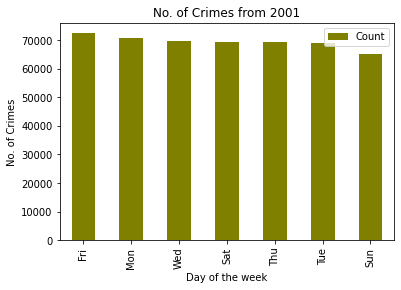

In [128]:
cp.sort_values('Count', ascending= False).plot(kind = 'bar', x = 'Day_of_week', y= 'Count', color = 'olive')
plt.xlabel("Day of the week")
plt.ylabel("No. of Crimes")
plt.title('No. of Crimes from 2001')
plt.show()